# Average Reading Duration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/vishal.patial/Desktop/MachineLearningWithPython/python/coursePageAction.txt")
df.head()



,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
# get the average reading duration for control group
control_mean = df.query('group == "control"')['duration'].mean()

In [5]:
# get the average reading duration for experiment group
experiment_mean = df.query('group == "experiment"')['duration'].mean()


In [6]:
# display average reading duration for each group
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [7]:
# compute observed difference in reading duration
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

15.525098619574393

In [13]:
# create sampling distribution of difference in average reading durations
# with boostrapping
diffs = []
for _ in range(10000):
    
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [12]:
# convert to numpy array
diffs = np.array(diffs)
diffs

array([ 17.33384184,  14.9159013 ,  15.06035142, ...,  13.74764529,
        15.9768631 ,  11.83758572])

(array([   24.,   148.,   774.,  1938.,  2968.,  2529.,  1232.,   332.,
           48.,     7.]),
 array([  7.36642803,   9.10383883,  10.84124963,  12.57866044,
         14.31607124,  16.05348205,  17.79089285,  19.52830366,
         21.26571446,  23.00312526,  24.74053607]),
 <a list of 10 Patch objects>)

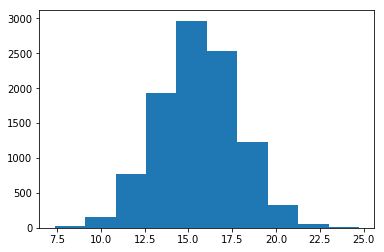

In [11]:
# plot sampling distribution
plt.hist(diffs)

In [ ]:

# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)
nulls_vals